#  TP : Reconnaissance de chiffres

Dans ce TP, nous voulons reconnaître des chiffres manuscrits en utilisant l'algorithme des $k$-moyennes.  
**Remarque** : le jeu de données utilisé est normalement utilisé pour de la classification supervisée (puisque les classes sont déjà connues) mais il est quand même intéressant d'utiliser l'algorithme des $k$-moyennes (qui est non-supervisé) pour voir s'il arrive à trouver les classes correspondants aux chiffres.

Commençons par charger les données :

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()
digits_matrix = digits.images[1000:] # utilisation d'une partie seulement pour accélérer les calculs
digits_matrix.shape

(797, 8, 8)

`digits_matrix` est un tableau `numpy` de taille $797\times 8\times 8$, c'est-à-dire $797$ matrices de taille $8\times 8$.

In [2]:
digits_matrix[0] # la 1ère matrice

array([[ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 12.,  0.,  0.],
       [ 0.,  0., 10., 14., 13., 16.,  8.,  3.],
       [ 0.,  0.,  2., 11., 12., 15., 16., 15.]])

Chacune de ces matrices est en fait une image de $8\times 8$ pixels, représentant un chiffre manuscrit.  
Chaque élément de la matrice représente un niveau de gris entre $0$ (blanc) et $16$ (noir).  
Par exemple, affichons l'image correspondant à la matrice ci-dessus :

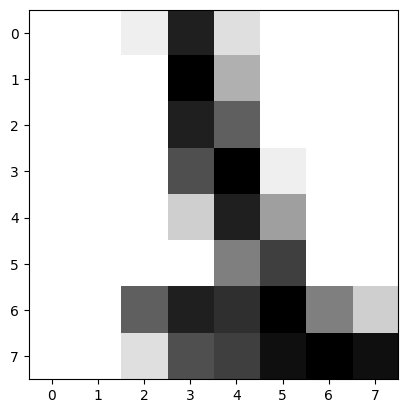

In [3]:
plt.imshow(digits_matrix[0], cmap=plt.cm.gray_r)
plt.show() # ça ressemble à un 1

## Redimensionner les images

Pour appliquer l'algorithme des $k$-moyennes, il faut que les données soient des vecteurs. On transforme donc une matrice en vecteur en concaténant les lignes de la matrice :  
$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
\longrightarrow
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9
\end{pmatrix}
$$

````{admonition} Question
 Écrire une fonction `to_vector(m)` qui prend en argument une matrice `m` et renvoie le vecteur correspondant, sous forme de liste.
````

In [5]:
assert len(to_vector(digits_matrix[0])) == 64 # les images 8*8 sont transformées en vecteur 64

````{admonition} Question
 Écrire une fonction `to_matrix(v)` qui prend en argument un vecteur `v` et renvoie la matrice correspondante, sous forme de liste de listes.
````

In [7]:
assert (to_matrix(to_vector(digits_matrix[0])) == digits_matrix[0]).all() 
# to_matrix et to_vector sont inverses l'une de l'autre

````{admonition} Question
 Définir une liste `X` contenant les vecteurs correspondant aux images dans `digits_matrix`. Cette variable `X` sera utilisée dans toute la suite.
````

## Algorithmes des $k$-moyennes

````{admonition} Question
 Écrire une fonction `d(u, v)` qui prend en argument deux vecteurs `u` et `v` et renvoie la distance euclidienne entre ces deux vecteurs.
````

In [10]:
d([1, 2, 3], [4, 5, 6])

5.196152422706632

Comme dans le cours, nous utilisons une liste `centres` pour stocker les centres des classes. `centres[i]` est le centre de la classe $i$.

````{admonition} Question
 Écrire une fonction `centres_aléatoires(X, k)` qui prend en argument une liste de vecteurs `X` et un entier `k` et renvoie une liste de `k` vecteurs aléatoires choisis dans `X`.  
On utilisera `random.sample` dont [on pourra consulter la documentation ici](https://docs.python.org/3/library/random.html). On pourra préalablement utiliser `random.seed(0)` pour avoir les mêmes résultats que le corrigé du TP.
````

In [28]:
centres = centres_aléatoires(X, 10)
assert len(centres) == 10 and len(centres[0]) == 64

````{admonition} Question
 Écrire une fonction `plus_proche(x, centres)` qui prend en argument un vecteur `x` et une liste de vecteurs `centres` et renvoie l'indice du centre le plus proche de `x`.
````

In [30]:
plus_proche([1, 2], [[4, 5], [2, 3], [4, 0]])

1

Contrairement à ce qui a été fait dans le cours, on utilise dans la suite une liste `classes` telle que `classes[i]` est le numéro de classe de `X[i]` (dans le cours, `classes[i]` était la liste des vecteurs de la classe $i$).

````{admonition} Question
 Écrire une fonction `calculer_classes(X, centres)` qui renvoie la liste `classes` correspondant à `X` et à `centres`.
````

In [32]:
classes = calculer_classes(X, centres_aléatoires(X, 10))
assert len(classes) == len(X) and max(classes) < 10 and min(classes) >= 0

````{admonition} Question
 Écrire une fonction `centre(X, classes, i)` qui renvoie le centre de la classe $i$.
````

In [34]:
assert len(centre(X, classes, 0)) == 64

````{admonition} Question
 Écrire une fonction `calculer_centres(X, classes, k)` qui renvoie la liste `centres` correspondant à `X` et à `classes`.
````

In [36]:
classes = calculer_classes(X, centres_aléatoires(X, 10))
assert len(calculer_centres(X, classes, 10)) == 10 and len(calculer_centres(X, classes, 10)[0]) == 64

````{admonition} Question
 Écrire une fonction `kmeans(X, centres, k)` qui, à partir de centres initiaux donnés en argument, applique l'algorithme des $k$-moyennes et renvoie un couple correspondant à la liste `(centres, classes)` obtenue à la fin de l'algorithme.
````

In [38]:
k = 10
centres, classes = kmeans(X, centres_aléatoires(X, k), k) # ceci prend quelques secondes

## Calcul de l'inertie

Dans cette partie, on réutilise les listes `centres` et `classes` obtenues précédemment par un appel à `kmeans`.

````{admonition} Question
 Écrire une fonction `inertie(X, centres, classes)` qui renvoie l'inertie de la partition définie par `classes`. On rappelle que l'inertie d'une partition est la somme des distances au carré des points à leur centre de classe.
````

In [40]:
inertie(X, centres, classes)

497072.30362746114

````{admonition} Question
 Réécrire la fonction `kmeans` précédente de façon à ce qu'elle renvoie aussi la liste des inerties obtenues à chaque itération de l'algorithme. Utiliser le code ci-dessous pour afficher aussi l'évolution de l'inertie au cours des itérations. Commenter.
````

In [ ]:
centres, classes, inerties = kmeans(X, centres_aléatoires(X, k), k) # ceci prend quelques secondes
plt.plot(inerties)
plt.show()

## Classification de nouvelles images

````{admonition} Question
 Exécuter le code suivant pour afficher le centre de chaque classe. Il s'agit donc, pour chaque classe, de l'image obtenue en faisant la moyenne (pixel par pixel) des images de la classe.
````

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for ax, center in zip(axes.ravel(), centres):
    ax.matshow(np.array(to_matrix(center)).reshape((8, 8)), cmap=plt.cm.gray_r)
    ax.axis('off')
plt.show()

Sur l'image ci-dessus, les classes sont représentés dans l'ordre, de gauche à droite et de haut en bas. Par exemple, l'image en haut à gauche correspond à la classe $0$, celle juste à droite à la classe $1$...

````{admonition} Question
 Définir une liste `classe_to_chiffre` telle que `classe_to_chiffre[i]` est le chiffre que vous pouvez lire pour le centre de la classe $i$.
````

````{admonition} Question
 Exécuter le code suivant pour stocker dans `X_test` les vecteurs correspondant aux images que l'on va essayer de classifier, en utilisant le résultat de `kmeans`.
````

In [45]:
X_test = list(map(to_vector, digits.images[:500]))

````{admonition} Exercice
  
1. Écrire une fonction `predict(x, centres, classe_to_chiffre)` qui renvoie le chiffre prédit pour l'image `x`. Il faut donc trouver la classe `i` la plus proche de `x` et renvoyer `classe_to_chiffre[i]`.  
2. Exécuter le code suivant pour afficher des images de `X_test` et les chiffres prédits.
````

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(8, 5))
for i, ax in enumerate(axes.ravel()):
    ax.matshow(np.array(to_matrix(X[i])).reshape((8, 8)), cmap=plt.cm.gray_r)
    ax.set_title(predict(X[i], centres, classe_to_chiffre))
    ax.axis('off')
plt.show()

````{admonition} Question
 Écrire une fonction `precision(centres)` qui renvoie la précision de cet algorithme de classification, sur les données de `X_test`. Pour cela, on compte la proportion de classe prédite pour `X_test[i]` égale à `digits.target[i]`.
````

In [49]:
precision(centres)

0.664

## Avec les $k$ plus proches voisins

````{admonition} Question
 Implémenter l'algorithme des $k$ plus proches voisins et comparer la précision obtenue avec celle des $k$-moyennes`. Quel algorithme de classification semble le plus adapté ici ?
````